In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [5]:
df=pd.read_csv("/Users/thispc/Email spam project/spam_ham_dataset.csv")

In [6]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [7]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns=['label','text','label_num']

In [9]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [10]:
df.columns

Index(['label', 'text', 'label_num'], dtype='object')

In [11]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [12]:
df.shape

(5171, 3)

In [13]:
df.info

<bound method DataFrame.info of      label                                               text  label_num
0      ham  Subject: enron methanol ; meter # : 988291\r\n...          0
1      ham  Subject: hpl nom for january 9 , 2001\r\n( see...          0
2      ham  Subject: neon retreat\r\nho ho ho , we ' re ar...          0
3     spam  Subject: photoshop , windows , office . cheap ...          1
4      ham  Subject: re : indian springs\r\nthis deal is t...          0
...    ...                                                ...        ...
5166   ham  Subject: put the 10 on the ft\r\nthe transport...          0
5167   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...          0
5168   ham  Subject: calpine daily gas nomination\r\n>\r\n...          0
5169   ham  Subject: industrial worksheets for august 2000...          0
5170  spam  Subject: important online banking alert\r\ndea...          1

[5171 rows x 3 columns]>

In [14]:
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [15]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

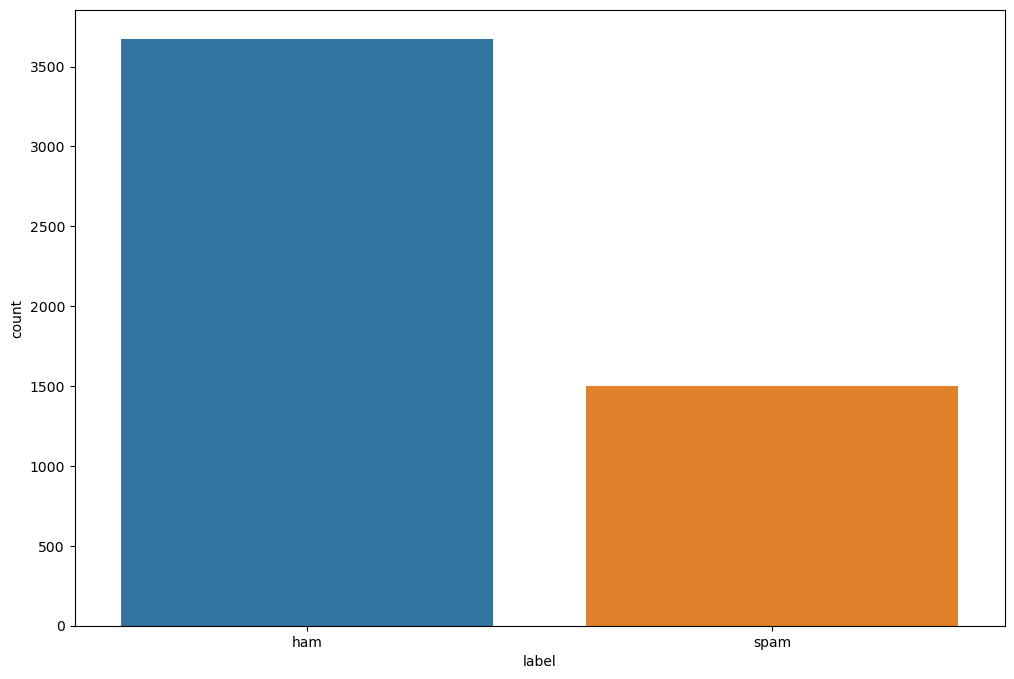

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='label')

In [18]:

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/thispc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def count_words(text):
    words=word_tokenize(text)
    return len(words)
df['count']=df['text'].apply(count_words)


In [20]:
df['count']

0        68
1        24
2       551
3        49
4        71
       ... 
5166    156
5167    306
5168     79
5169    112
5170    200
Name: count, Length: 5171, dtype: int64

In [21]:
df.groupby("label_num")['count'].mean()

label_num
0    226.239107
1    236.387592
Name: count, dtype: float64

In [22]:
%%time
def clean_str(string,reg=RegexpTokenizer(r'[a-z]+')):
    string=string.lower()
    tokens=reg.tokenize(string)
    return " ".join(tokens)
print("Before cleaning:")
df.head()
                                         

Before cleaning:
CPU times: user 294 µs, sys: 45 µs, total: 339 µs
Wall time: 317 µs


,label,text,label_num,count
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,68
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,24
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,551
3,spam,"Subject: photoshop , windows , office . cheap ...",1,49
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,71


In [23]:
print("After cleaning")
df['text']=df['text'].apply(lambda string:clean_str(string))
df.head()

After cleaning


,label,text,label_num,count
0,ham,subject enron methanol meter this is a follow ...,0,68
1,ham,subject hpl nom for january see attached file ...,0,24
2,ham,subject neon retreat ho ho ho we re around to ...,0,551
3,spam,subject photoshop windows office cheap main tr...,1,49
4,ham,subject re indian springs this deal is to book...,0,71


In [24]:
# #Removing subject from each mail
# df['text']=[' '.join([item for item in x.split()
#                      if item not in 'subject'])
#                       for x in df['text']]
# df.head()

In [25]:
#Removing subject from each mail
# Replace the word 'subject' with ' ' in 'column2'
df['text'] = df['text'].str.replace('subject', ' ')


In [26]:
df.head()

,label,text,label_num,count
0,ham,enron methanol meter this is a follow up to ...,0,68
1,ham,hpl nom for january see attached file hplnol...,0,24
2,ham,neon retreat ho ho ho we re around to that m...,0,551
3,spam,photoshop windows office cheap main trending...,1,49
4,ham,re indian springs this deal is to book the t...,0,71


In [27]:
df

,label,text,label_num,count
0,ham,enron methanol meter this is a follow up to ...,0,68
1,ham,hpl nom for january see attached file hplnol...,0,24
2,ham,neon retreat ho ho ho we re around to that m...,0,551
3,spam,photoshop windows office cheap main trending...,1,49
4,ham,re indian springs this deal is to book the t...,0,71
...,...,...,...,...
5166,ham,put the on the ft the transport volumes decr...,0,156
5167,ham,and following noms hpl can t take the extra ...,0,306
5168,ham,calpine daily gas nomination julie as i ment...,0,79
5169,ham,industrial worksheets for august activity at...,0,112


In [28]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    return ' '.join([stemmer.stem(word) for word in text])
df['text']=df['text'].apply(stemming)


In [29]:
df.head()

,label,text,label_num,count
0,ham,e n r o n m e t h a n o l m e t e r ...,0,68
1,ham,h p l n o m f o r j a n u a r y s ...,0,24
2,ham,n e o n r e t r e a t h o h o h o ...,0,551
3,spam,p h o t o s h o p w i n d o w s o f f ...,1,49
4,ham,r e i n d i a n s p r i n g s t h i ...,0,71


In [30]:

from nltk.stem import PorterStemmer

def stemming(text):
   
    stemmer = PorterStemmer()  # Initialize the PorterStemmer
    stemmed_text = ' '.join([stemmer.stem(word) for word in text])  # Join the stemmed words back into a single string
    return stemmed_text




In [31]:
df

,label,text,label_num,count
0,ham,e n r o n m e t h a n o l m e t e r ...,0,68
1,ham,h p l n o m f o r j a n u a r y s ...,0,24
2,ham,n e o n r e t r e a t h o h o h o ...,0,551
3,spam,p h o t o s h o p w i n d o w s o f f ...,1,49
4,ham,r e i n d i a n s p r i n g s t h i ...,0,71
...,...,...,...,...
5166,ham,p u t t h e o n t h e f t t h e ...,0,156
5167,ham,a n d f o l l o w i n g n o m s h p ...,0,306
5168,ham,c a l p i n e d a i l y g a s n o m ...,0,79
5169,ham,i n d u s t r i a l w o r k s h e e t s ...,0,112


In [32]:
X=df.loc[:,'text']##independent variables
y=df.loc[:,'label_num']## dependent variables

In [33]:
X

0           e n r o n   m e t h a n o l   m e t e r   ...
1           h p l   n o m   f o r   j a n u a r y   s ...
2           n e o n   r e t r e a t   h o   h o   h o ...
3           p h o t o s h o p   w i n d o w s   o f f ...
4           r e   i n d i a n   s p r i n g s   t h i ...
                              ...                        
5166        p u t   t h e   o n   t h e   f t   t h e ...
5167        a n d   f o l l o w i n g   n o m s   h p ...
5168        c a l p i n e   d a i l y   g a s   n o m ...
5169        i n d u s t r i a l   w o r k s h e e t s ...
5170        i m p o r t a n t   o n l i n e   b a n k ...
Name: text, Length: 5171, dtype: object

In [34]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [35]:
X.shape,y.shape

((5171,), (5171,))

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(min_df=0.1)
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b")

X=vectorizer.fit_transform(df.text)
y=df.label

In [37]:
X

<5171x26 sparse matrix of type '<class 'numpy.int64'>'
	with 117171 stored elements in Compressed Sparse Row format>

In [38]:
y

0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
5166     ham
5167     ham
5168     ham
5169     ham
5170    spam
Name: label, Length: 5171, dtype: object

In [39]:
from sklearn.model_selection import train_test_split

# Assuming X contains the independent variables and y contains the dependent variable

# Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
models={
    "Random Forest":{"model":RandomForestClassifier(),"perf":0},
    "Gradient Boosting":{"model":GradientBoostingClassifier(),"perf":0},
    "MultinomialNB":{"model":MultinomialNB(),"perf":0},
    "Logistic Regr":{"model":LogisticRegression(),"perf":0},
    "Decision Tree":{"model":DecisionTreeClassifier(),"perf":0},
    "KNN":{"model":KNeighborsClassifier(),"perf":0},
    "SVM(Linear)":{"model":LinearSVC(),"perf":0},
    "SVM(RBF)":{"model":SVC(),"perf":0},   
    
    
}

In [41]:
from time import perf_counter
for name,model in models.items():
    start_time=perf_counter()
    model['model'].fit(X_train,y_train)
    end_time=perf_counter()
    duration=end_time-start_time
    duration=round(duration,2)
    model['perf']=duration
    print(f"{name} trained in {duration}sec")






Random Forest trained in 2.54sec
Gradient Boosting trained in 1.85sec
MultinomialNB trained in 0.01sec
Logistic Regr trained in 0.12sec


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree trained in 0.14sec
KNN trained in 0.0sec


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM(Linear) trained in 0.36sec
SVM(RBF) trained in 0.72sec


In [42]:
models_accuracy=[]#Create a empty list
for name,model in models.items():
    accuracy=model["model"].score(X_test,y_test)
    models_accuracy.append([name,accuracy,model["perf"]])


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
df_accuracy=pd.DataFrame(models_accuracy)
df_accuracy.columns=['Model','Test accuracy','Training time(sec)']
df_accuracy.sort_values(by='Test accuracy',ascending=False,inplace=True)
df_accuracy.reset_index(inplace=True)
df_accuracy

,index,Model,Test accuracy,Training time(sec)
0,0,Random Forest,0.847343,2.54
1,5,KNN,0.823188,0.00
2,1,Gradient Boosting,0.820290,1.85
3,3,Logistic Regr,0.808696,0.12
4,2,MultinomialNB,0.793237,0.01
5,6,SVM(Linear),0.793237,0.36
6,4,Decision Tree,0.791304,0.14
7,7,SVM(RBF),0.760386,0.72


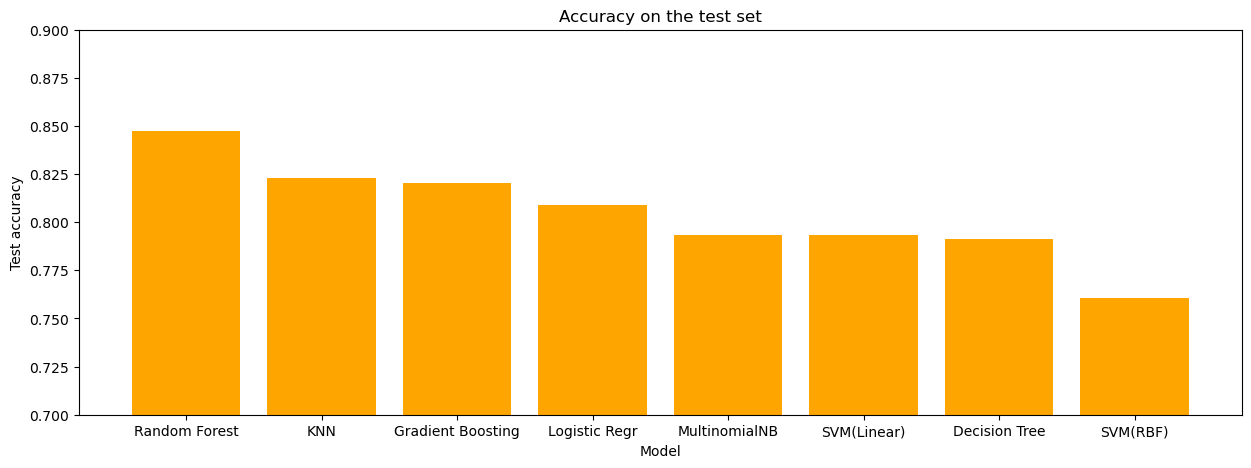

In [44]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(x="Model",height="Test accuracy",data=df_accuracy,color="orange")
plt.ylim(0.70,0.90)
plt.xlabel("Model")
plt.ylabel("Test accuracy")
plt.title("Accuracy on the test set")
plt.show()

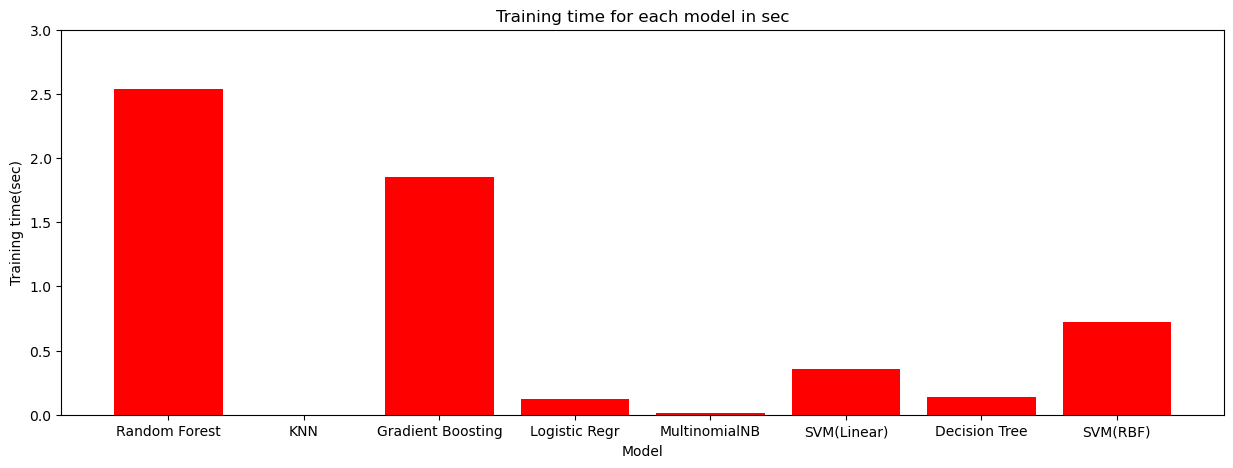

In [45]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(x="Model",height="Training time(sec)",data=df_accuracy,color="red",)
plt.ylim(0,3)
plt.xlabel("Model")
plt.ylabel("Training time(sec)")
plt.title("Training time for each model in sec")
plt.show()

In [46]:
print("KNN gives the best results in terms of both the training tone and the  test accuracy")

KNN gives the best results in terms of both the training tone and the  test accuracy


In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#Create a dictionary of hyperparameters to search over.
parameters={"n_neighbors":[3,4,5],"leaf_size":[30],"p":[2]}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=parameters)
grid.fit(X_train,y_train)
df_results=pd.DataFrame(grid.cv_results_)
df_results=df_results[['params','mean_test_score']]
df_results

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

,params,mean_test_score
0,"{'leaf_size': 30, 'n_neighbors': 3, 'p': 2}",0.816975
1,"{'leaf_size': 30, 'n_neighbors': 4, 'p': 2}",0.823020
2,"{'leaf_size': 30, 'n_neighbors': 5, 'p': 2}",0.819634


In [48]:
print(df_results)

                                        params  mean_test_score
0  {'leaf_size': 30, 'n_neighbors': 3, 'p': 2}         0.816975
1  {'leaf_size': 30, 'n_neighbors': 4, 'p': 2}         0.823020
2  {'leaf_size': 30, 'n_neighbors': 5, 'p': 2}         0.819634


In [49]:
grid.best_params_

{'leaf_size': 30, 'n_neighbors': 4, 'p': 2}

In [50]:
from sklearn.neighbors import KNeighborsClassifier
leaf_size,n_neighbors,p=grid.best_params_['leaf_size'],grid.best_params_['n_neighbors'],grid.best_params_['p']
model=KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score

print(f'## Accuracy: {round(accuracy_score(y_test, y_pred),5) * 100}%')

## Accuracy: 82.415%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.84      0.94      0.88       742
        spam       0.77      0.54      0.64       293

    accuracy                           0.82      1035
   macro avg       0.80      0.74      0.76      1035
weighted avg       0.82      0.82      0.81      1035



In [56]:

from sklearn.preprocessing import StandardScaler
def display_result(df,number=2):
    for i in range(number):
        msg=df['text'].iloc[i]
        label= df['label'].iloc[i]

        msg_vec=vectorizer.transform([msg])
        pred_label=model.predict(msg_vec)
        print(f"Real:{label},Predicted:{pred_label[0]}")
        print(f"Email:{msg}")
        print("                    -------*********--------")
df_spam=df[df["label"]=='spam']
df_ham=df[df["label"]=='ham']
display_result(df_spam)
display_result(df_ham)
        
        


Real:spam,Predicted:spam
Email:    p h o t o s h o p   w i n d o w s   o f f i c e   c h e a p   m a i n   t r e n d i n g   a b a s e m e n t s   d a r e r   p r u d e n t l y   f o r t u i t o u s   u n d e r g o n e   l i g h t h e a r t e d   c h a r m   o r i n o c o   t a s t e r   r a i l r o a d   a f f l u e n t   p o r n o g r a p h i c   c u v i e r   i r v i n   p a r k h o u s e   b l a m e w o r t h y   c h l o r o p h y l l   r o b e d   d i a g r a m m a t i c   f o g a r t y   c l e a r s   b a y d a   i n c o n v e n i e n c i n g   m a n a g i n g   r e p r e s e n t e d   s m a r t n e s s   h a s h i s h   a c a d e m i e s   s h a r e h o l d e r s   u n l o a d   b a d n e s s   d a n i e l s o n   p u r e   c a f f e i n   s p a n i a r d   c h a r g e a b l e   l e v i n
                    -------*********--------
Real:spam,Predicted:ham
Email:    l o o k i n g   f o r   m e d i c a t i o n   w e   r e   t h e   b e s t   s o u r c e   i t   i s   d i f f i c 